<a href="https://colab.research.google.com/github/den2morrow/colab_research/blob/main/%D0%9F%D1%80%D0%BE%D0%B1%D1%83%D1%8E_%D1%81_%D0%BD%D1%83%D0%BB%D1%8F_%D1%81%D0%BE%D0%B7%D0%B4%D0%B0%D1%82%D1%8C_%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BA%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Этапы работы
1. Создать данные и отобразить их график
2. Создать класс нейронной сети
3. Написать обучение для нейронной сети

## Создаем данные и отображаем их график

In [36]:
car_price_np = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1], dtype='float32').reshape(-1,1)
car_price_tensor = torch.from_numpy(car_price_np)
times_sell_np = np.arange(1, 10).reshape(-1, 1)
times_sell_tensor = torch.from_numpy(times_sell_np).type_as(car_price_tensor)

In [37]:
car_price_tensor.type(), times_sell_tensor.type()

('torch.FloatTensor', 'torch.FloatTensor')

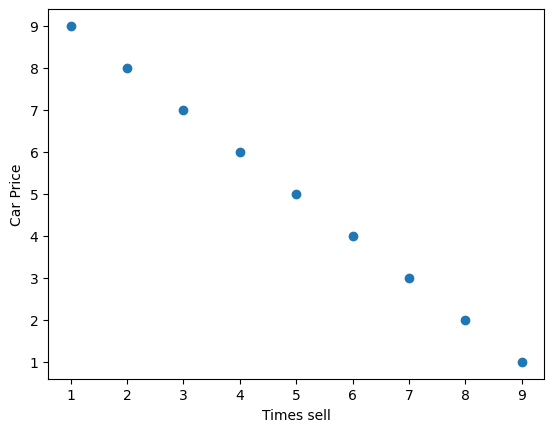

In [38]:
plt.scatter(car_price_np, times_sell)
plt.xlabel('Times sell')
plt.ylabel('Car Price')
plt.show()

## Создаем класс нейронной сети


In [39]:
class LinearRegression(nn.Module):

  def __init__(self, input_size, output_size):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    return self.linear(x)

Эпоха обучения 0, ошибка эпохи 23.716798782348633


Эпоха обучения 50, ошибка эпохи 7.891534805297852




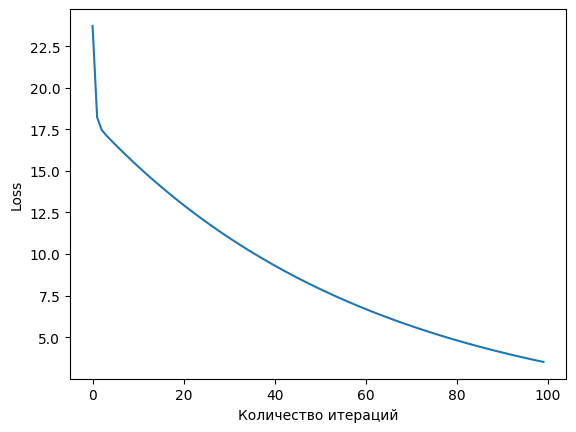

In [65]:
input_dim = 1
output_dim = 1
learning_rate = 0.02

model_linear = LinearRegression(input_dim, output_dim)
mse = nn.MSELoss()
optimizer = torch.optim.SGD(model_linear.parameters(), lr=learning_rate)


loss_list = []
epochs = 100
for i in range(epochs):
  optimizer.zero_grad()

  results = model_linear(car_price_tensor)
  loss = mse(results, times_sell_tensor)
  loss.backward()

  optimizer.step()

  loss_list.append(loss.item())
  if i % 50 == 0:
    print(f"Эпоха обучения {i}, ошибка эпохи {loss.item()}")
    print('=' * 100 + '\n\n')


plt.plot(range(epochs), loss_list)
plt.xlabel("Количество итераций")
plt.ylabel("Loss")
plt.show()

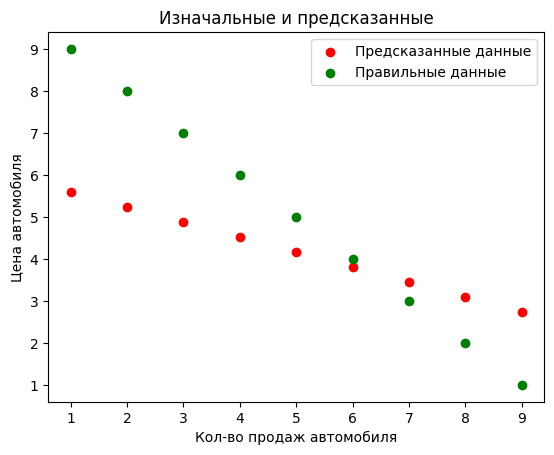

In [66]:
predicted = model_linear(car_price_tensor).data
plt.scatter(car_price_np, predicted, label='Предсказанные данные', color='red')
plt.scatter(car_price_np, times_sell_tensor, label='Правильные данные', color='green')
plt.xlabel('Кол-во продаж автомобиля')
plt.ylabel('Цена автомобиля')
plt.title('Изначальные и предсказанные')
plt.legend()
plt.show()